In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_masks.npy')

In [3]:
X_test = images[9690:11990]
y_test = masks[9690:11990]

In [4]:
images = images[:9690]
masks = masks[:9690]

In [5]:
images.shape

(9690, 512, 512, 1)

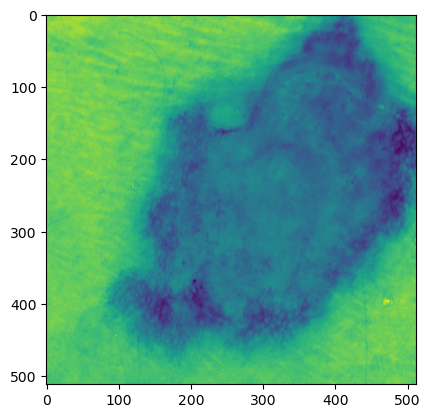

In [6]:
imshow(images[100])

In [7]:
masks.shape

(9690, 512, 512, 1)

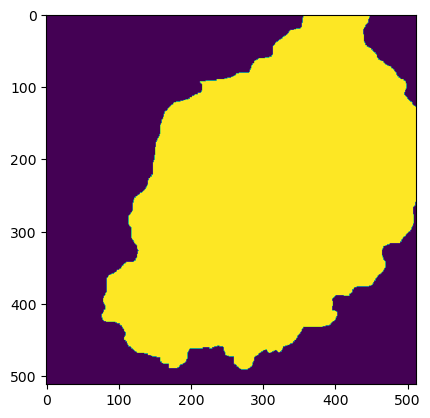

In [8]:
imshow(masks[100])

In [9]:
import sys
sys.path.append('../')
import gp2

In [10]:
from keras import losses

In [11]:
loss_fx = losses.BCE

In [12]:
C = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmp13gi8le1kuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpr2li2tvakuc_unet2d


In [13]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmpr2li2tvakuc_unet2d
Verbose mode active!


In [14]:
R.classifier = C ### use custom classifier

In [15]:
R.run(images, masks, runs=5, batch_size=16, shuffle=True, results_file='/raid/mpsych/OMAMA/GP2/results/kuc_unet2d_0kuc_unet2d_model_1_5_test.pkl')

Shuffling data...
Weights OK!
******
Loop 1
Epoch 1/100
31/31 [==============================] - 36s 741ms/step - loss: 0.1280 - dice_coeff: 0.8693 - val_loss: 0.1152 - val_dice_coeff: 0.8854
Epoch 2/100
31/31 [==============================] - 15s 502ms/step - loss: 0.1007 - dice_coeff: 0.9022 - val_loss: 0.1237 - val_dice_coeff: 0.8816
Epoch 3/100
31/31 [==============================] - 15s 489ms/step - loss: 0.0872 - dice_coeff: 0.9117 - val_loss: 0.1203 - val_dice_coeff: 0.8933
Epoch 4/100
31/31 [==============================] - 15s 489ms/step - loss: 0.0820 - dice_coeff: 0.9183 - val_loss: 0.1260 - val_dice_coeff: 0.8943
Epoch 5/100
31/31 [==============================] - 15s 497ms/step - loss: 0.0724 - dice_coeff: 0.9269 - val_loss: 0.1391 - val_dice_coeff: 0.8972
Epoch 6/100
31/31 [==============================] - 15s 489ms/step - loss: 0.0720 - dice_coeff: 0.9277 - val_loss: 0.1298 - val_dice_coeff: 0.8949
Epoch 7/100
31/31 [==============================] - 15s 492ms/step 

Testing the classifier...
Testing the discriminator...
19/19 [==============================] - 1s 35ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 298 machine labels.
Replacing 99 from 298 !
D_relabeled_ 99
point ids 99
Removed: 99 Filled: 99
TOOK 459.0204608440399 seconds
==== DONE LOOP 3 ====
******
Loop 4
Epoch 1/100
49/49 [==============================] - 24s 500ms/step - loss: 0.0676 - dice_coeff: 0.9361 - val_loss: 0.1592 - val_dice_coeff: 0.8803
Epoch 2/100
49/49 [==============================] - 20s 412ms/step - loss: 0.0634 - dice_coeff: 0.9386 - val_loss: 0.1776 - val_dice_coeff: 0.8859
Epoch 3/100
49/49 [==============================] - 20s 416ms/step - loss: 0.0553 - dice_coeff: 0.9451 - val_loss: 0.1648 - val_dice_coeff: 0.8936
Epoch 4/100
49/49 [==============================] - 20s 412ms/step - loss: 0.0446 - dice_coeff: 0.9555 - val_loss: 0.1701 - val_dice_coeff: 0.8932
Epoch 5/100
49/49 [==============================] - 20s 417ms/step - loss: 0.0414 - dice_co

In [16]:
R.classifier_scores

[[0.1557406634092331, 0.8938592672348022],
 [0.19067057967185974, 0.9033409357070923],
 [0.23246262967586517, 0.9047273993492126],
 [0.22277052700519562, 0.8958461880683899],
 [0.1717977523803711, 0.8674349188804626]]

In [17]:
R.discriminator_scores

[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]

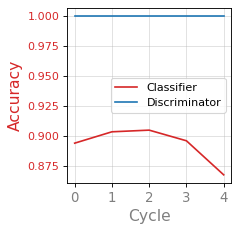

In [18]:
R.plot()

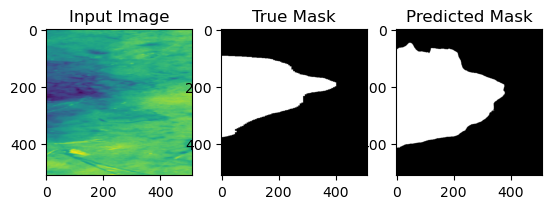

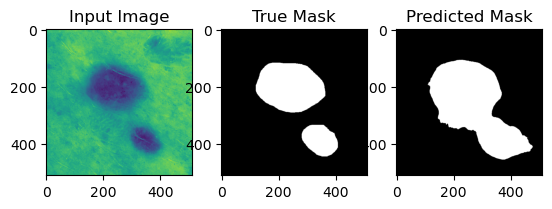

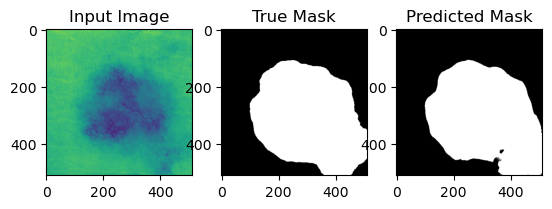

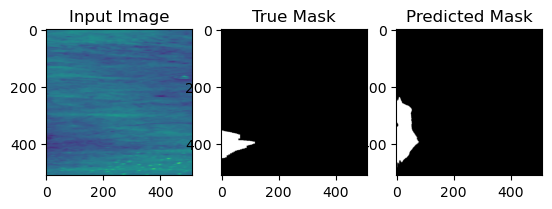

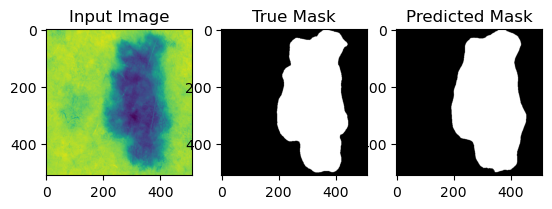

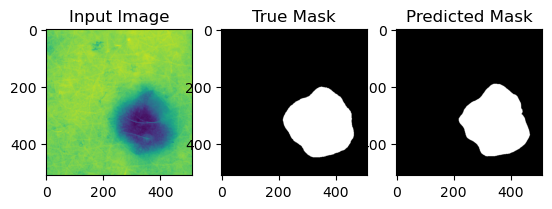

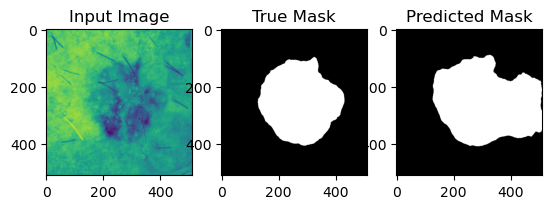

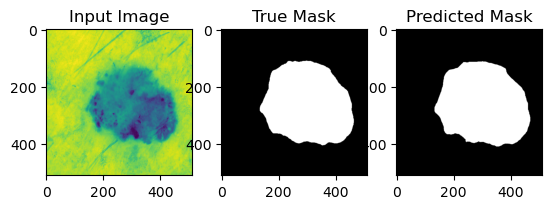

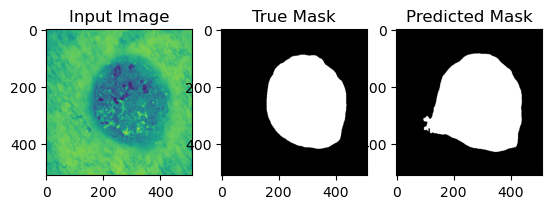

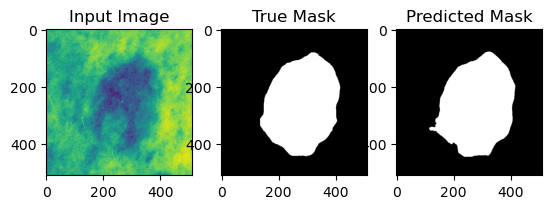

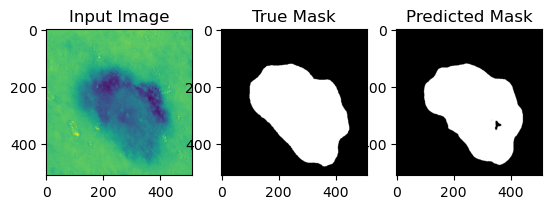

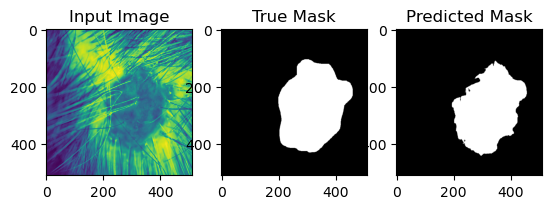

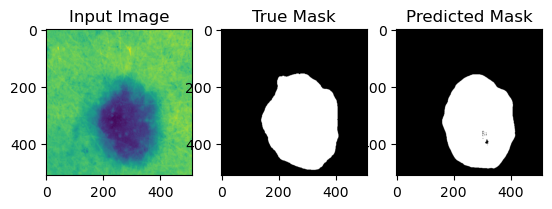

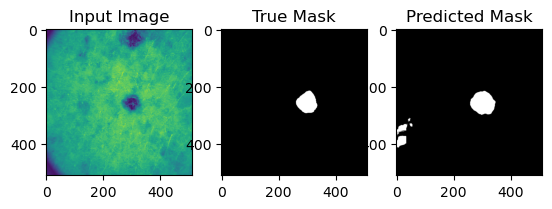

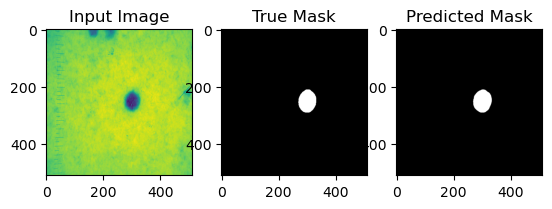

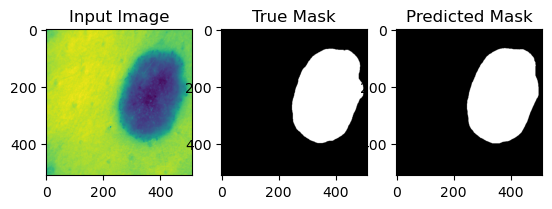

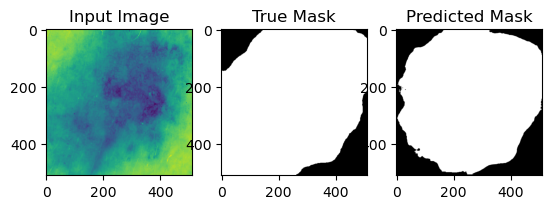

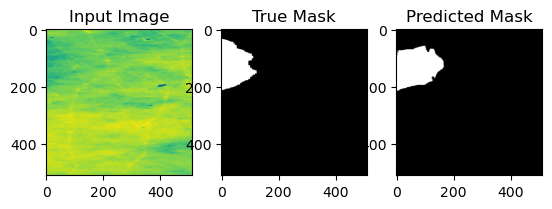

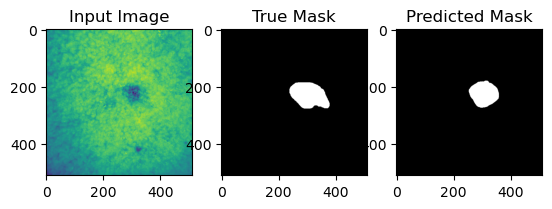

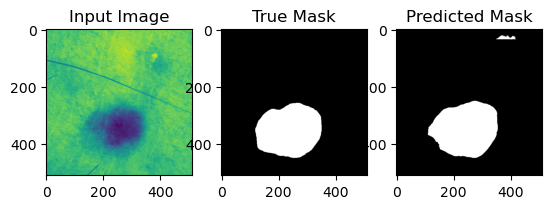

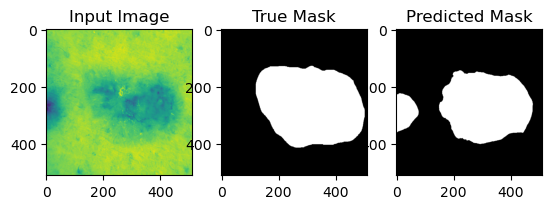

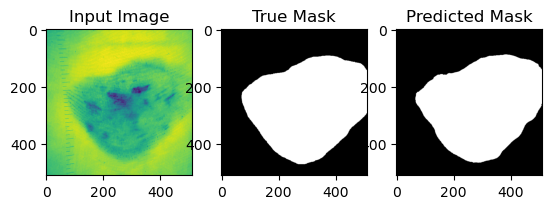

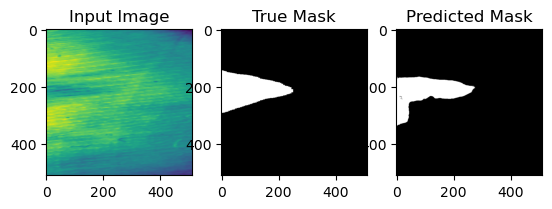

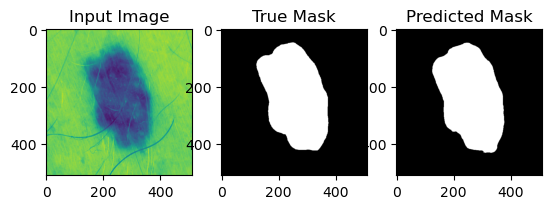

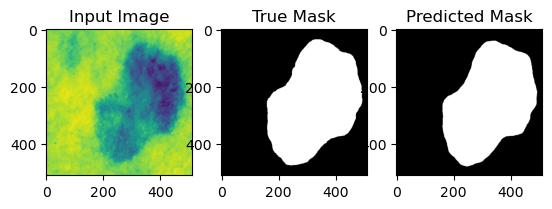

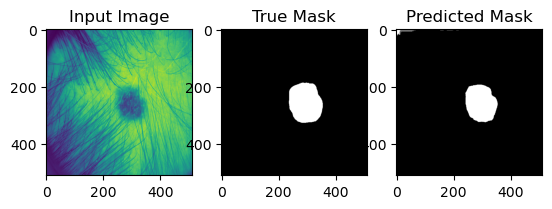

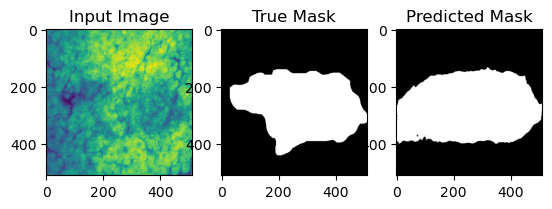

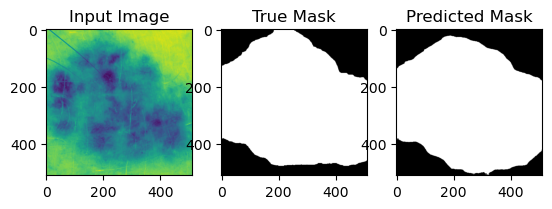

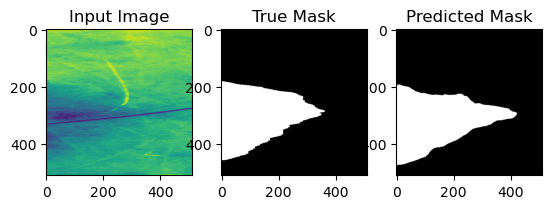

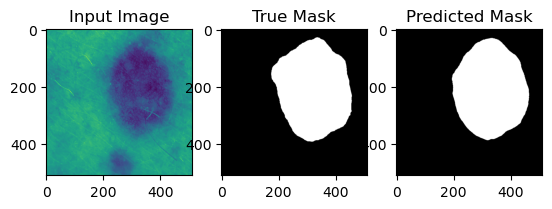

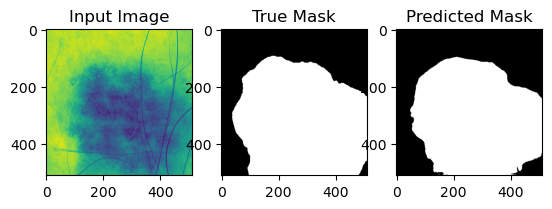

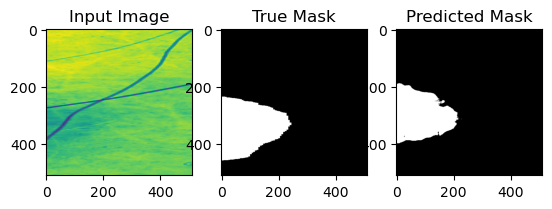

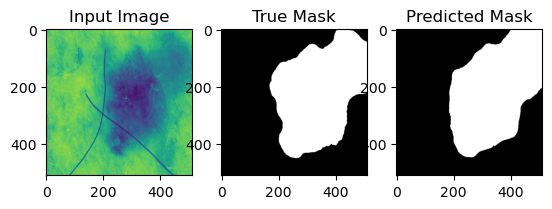

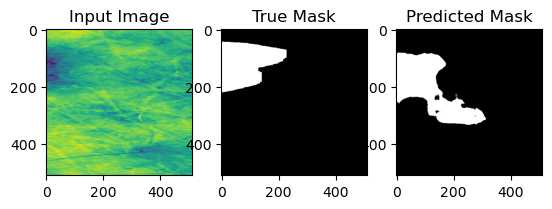

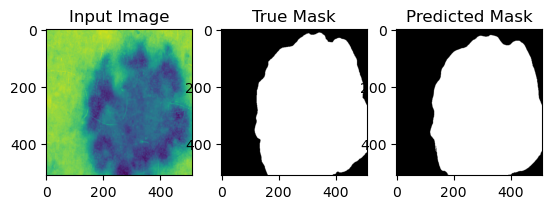

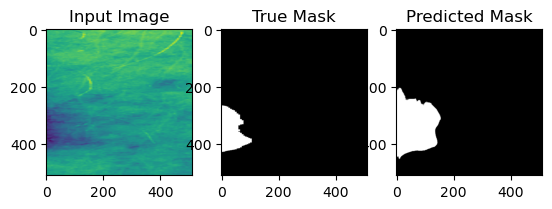

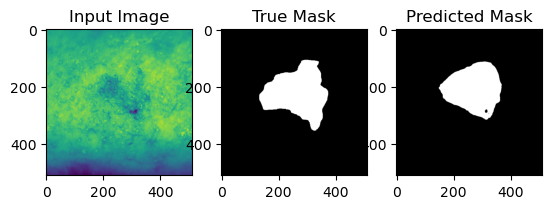

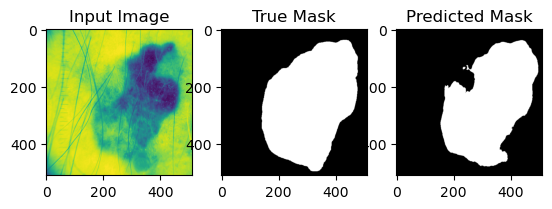

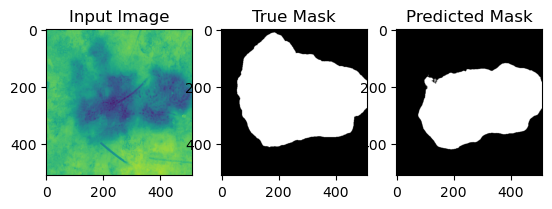

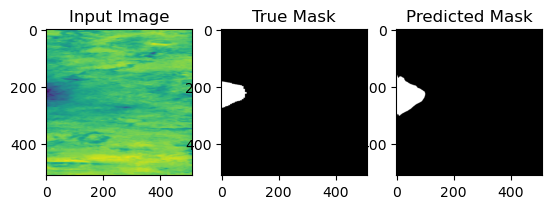

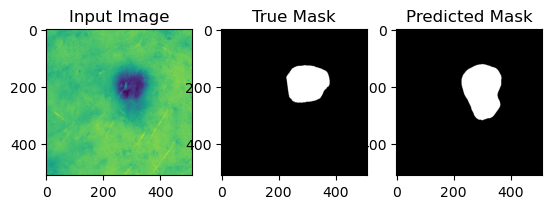

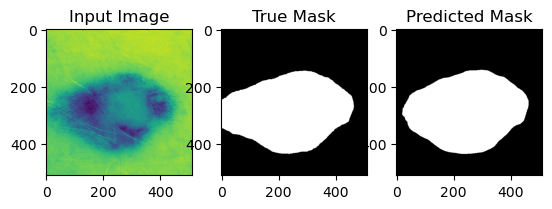

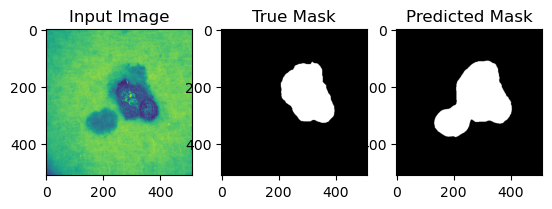

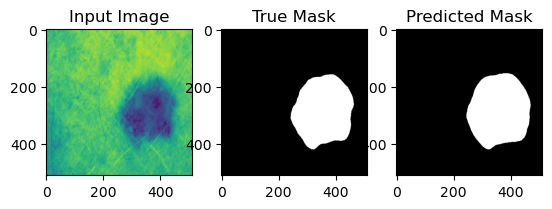

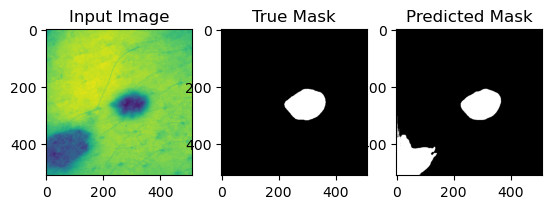

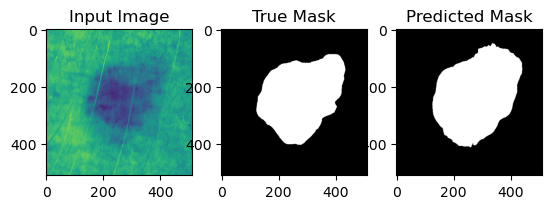

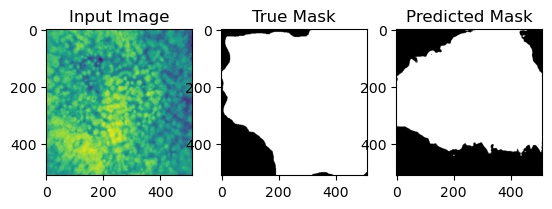

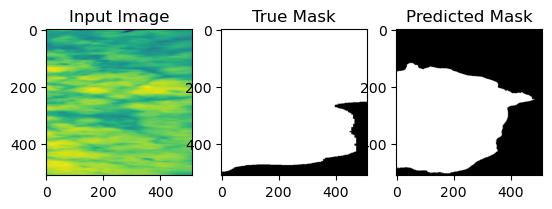

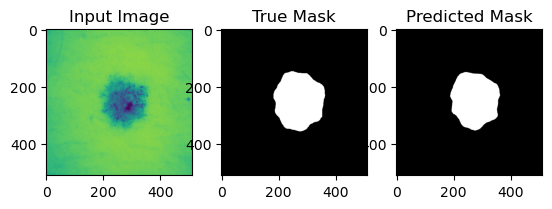

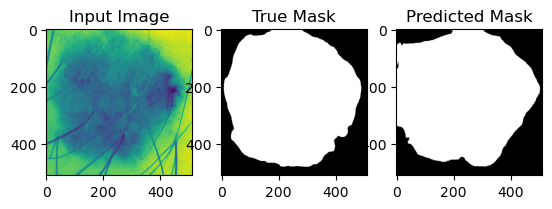

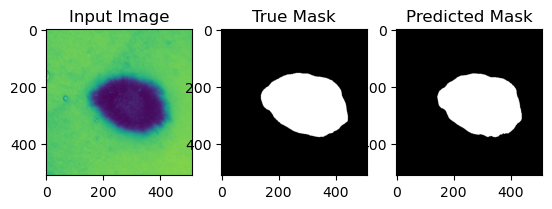

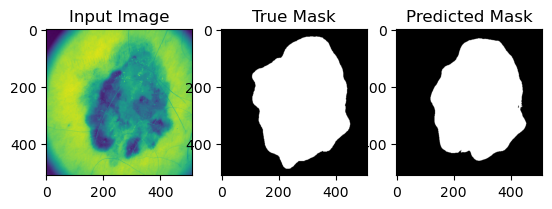

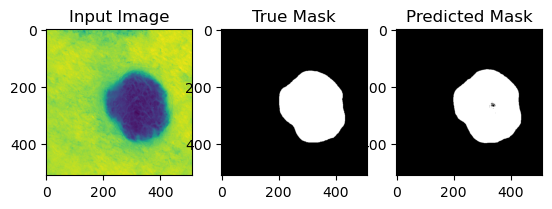

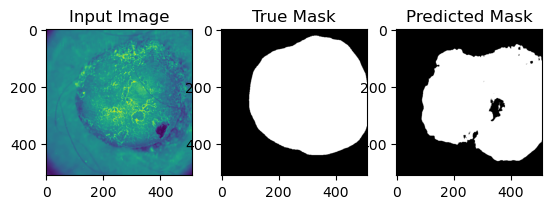

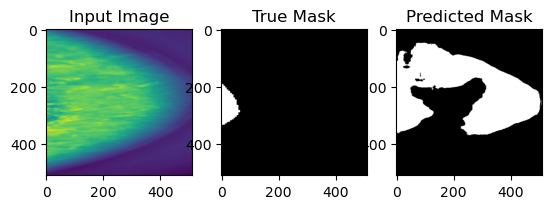

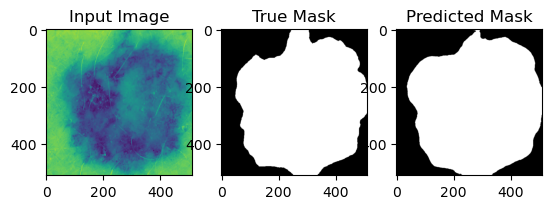

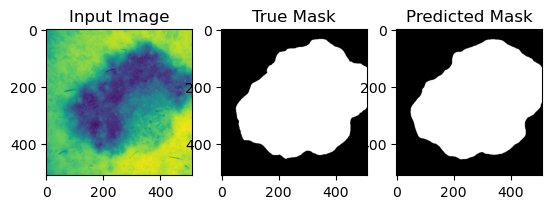

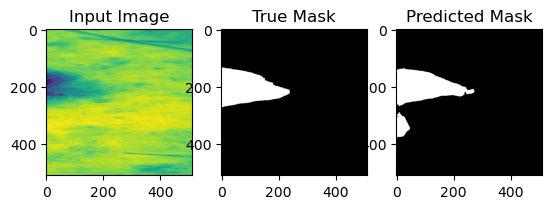

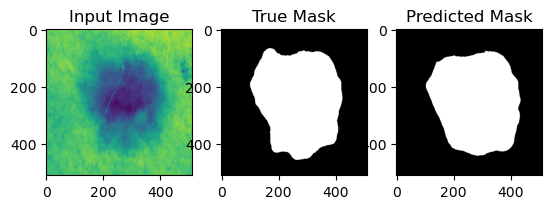

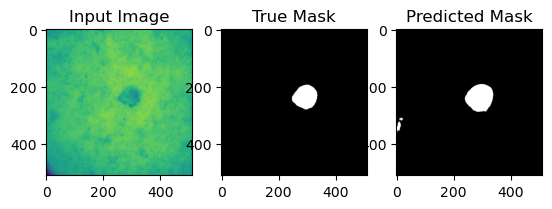

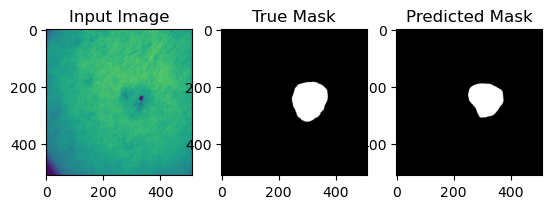

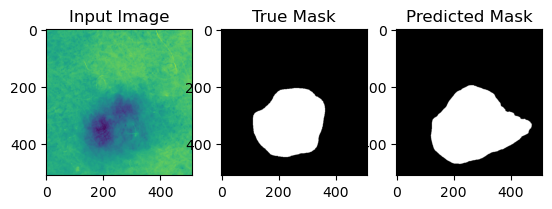

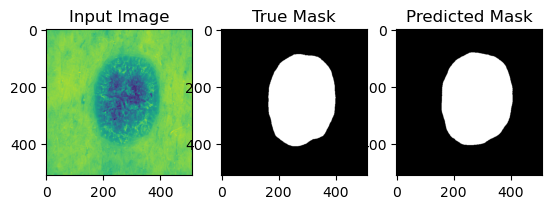

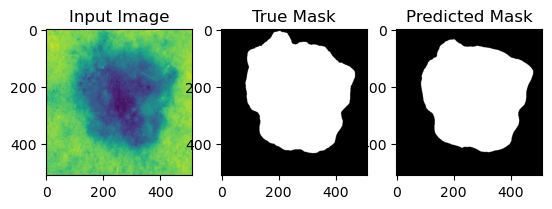

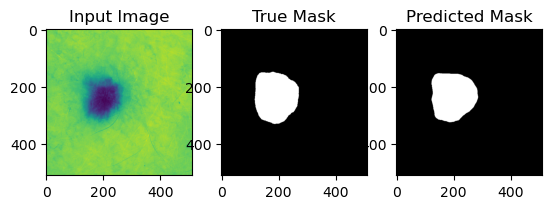

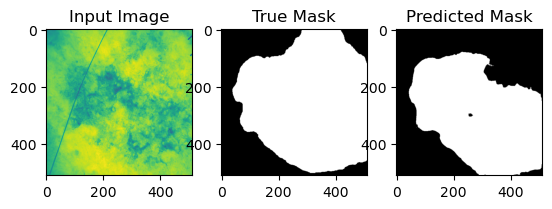

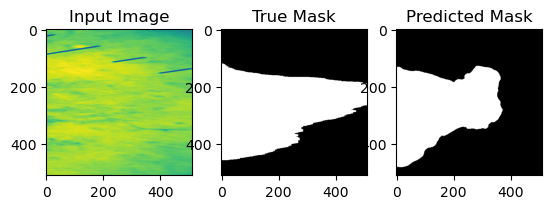

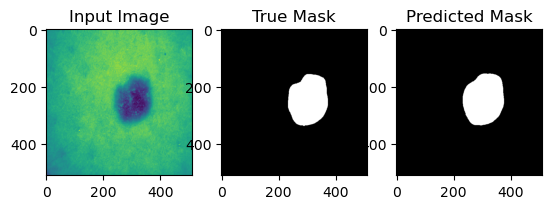

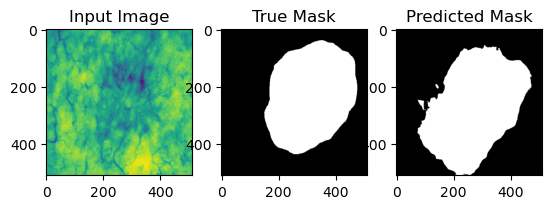

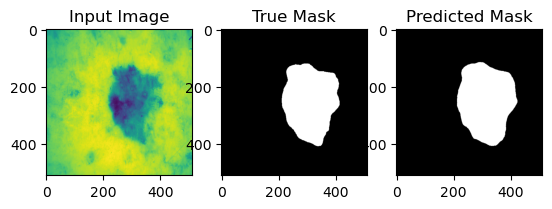

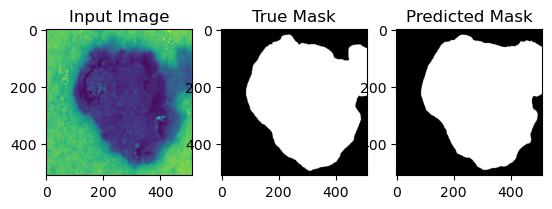

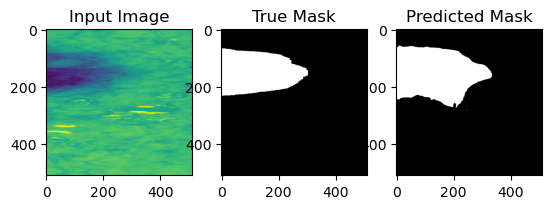

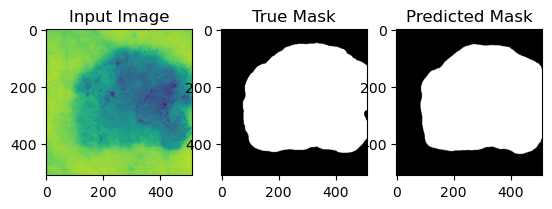

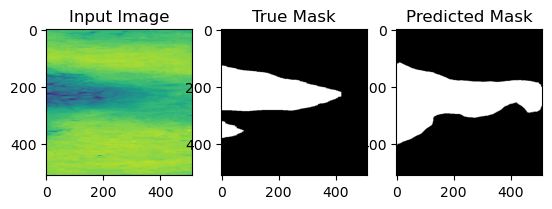

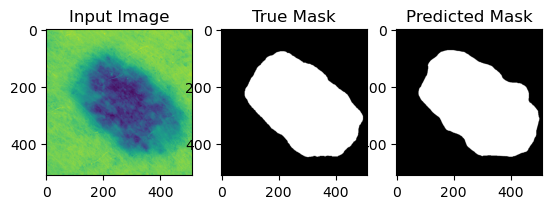

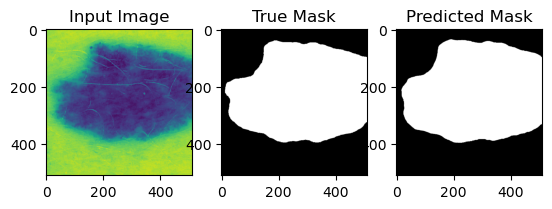

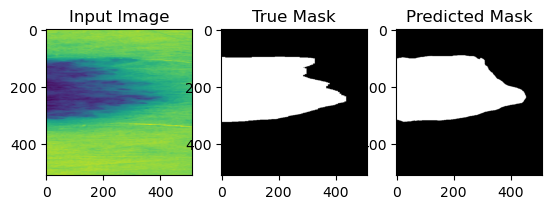

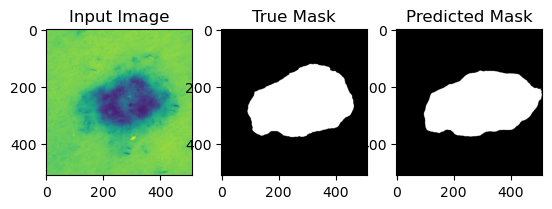

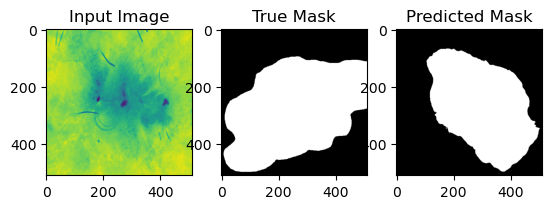

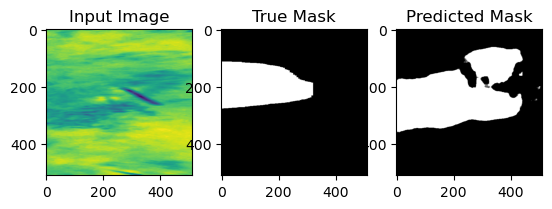

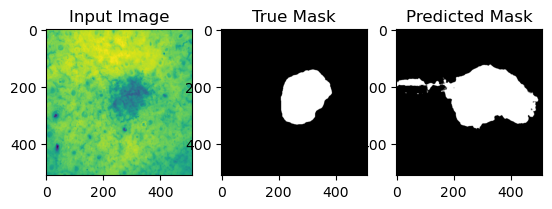

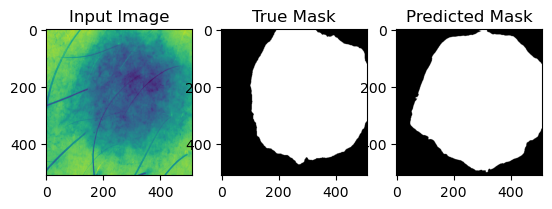

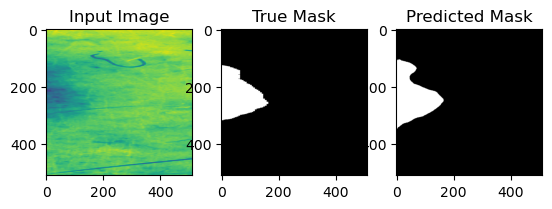

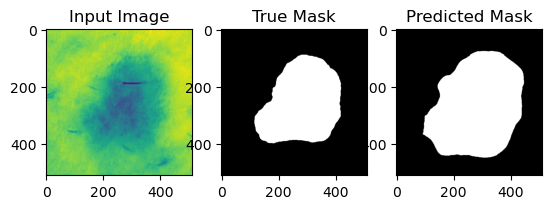

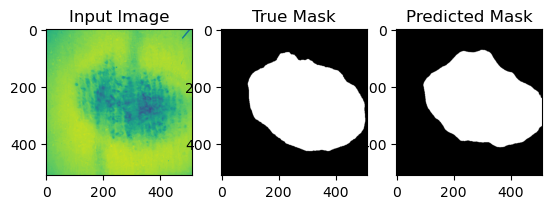

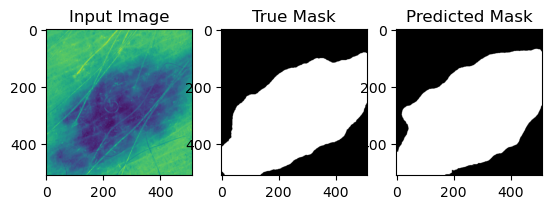

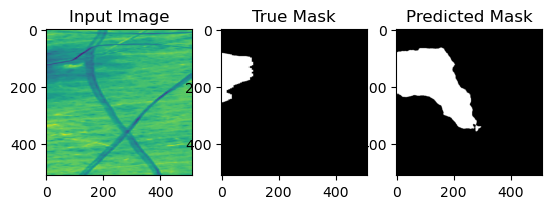

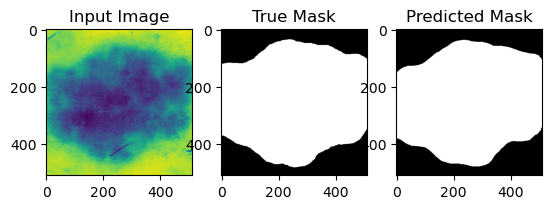

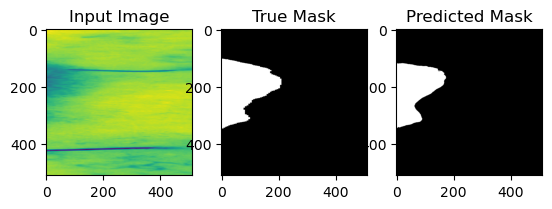

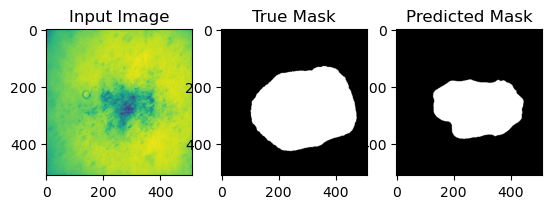

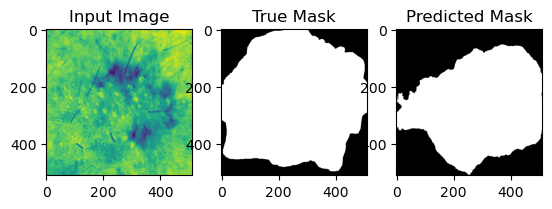

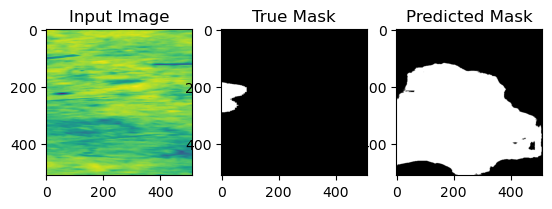

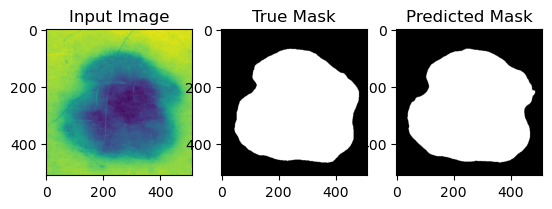

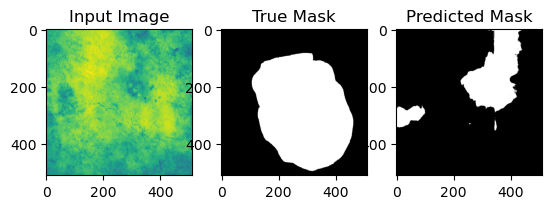

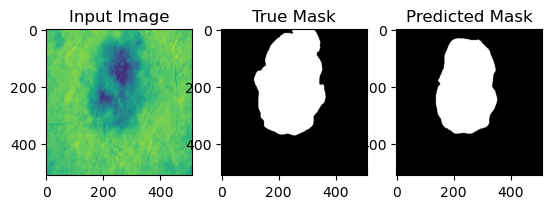

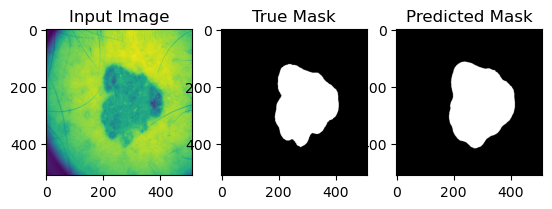

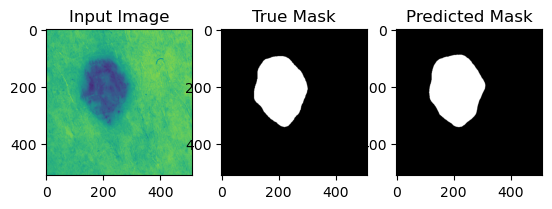

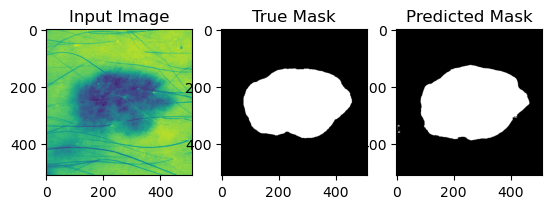

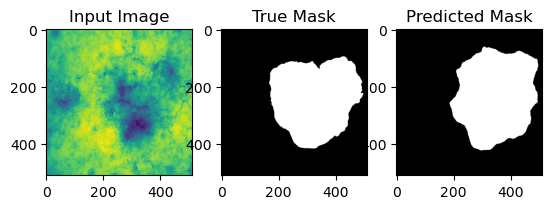

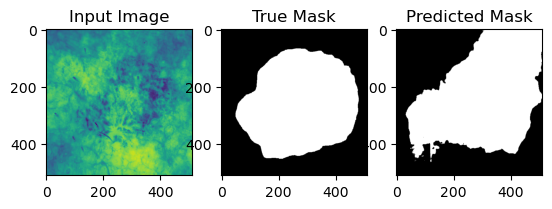

In [19]:
gp2.Util.visualize_predictions(C, X_test, y_test, num_samples=100)

In [20]:
y_pred = R.classifier.predict(X_test, y_test)

In [21]:
y_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [22]:
BareBone = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmp13gi8le1kuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpr2li2tvakuc_unet2d


In [23]:
barebone_pred = BareBone.predict(X_test, y_test)

In [24]:
barebone_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [25]:
R.classifier.model.metrics_names

['loss', 'dice_coeff']

In [26]:
BareBone.model.metrics_names

['loss', 'dice_coeff']